In [1]:
import strax  
import straxen
import numpy as np
import matplotlib.pyplot as plt

st = straxen.contexts.xenon1t_dali(build_lowlevel=False)

In [2]:
peaklets=st.get_array('170204_1410','peaklets')

* Plot first peak in the run

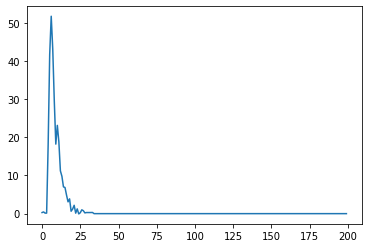

In [3]:
plt.plot(peaklets['data'][0])

* Look at the PMTs that contributed to this peak

In [4]:
channels= peaklets['area_per_channel'][0]

In [5]:
pmts=np.where(channels!=0)

In [6]:
pmts

(array([  6,  25,  37,  39,  40,  46,  52,  54,  55,  69,  70,  74,  77,
         82,  89,  93,  94,  99, 105, 110, 113, 114, 123, 124, 127, 128,
        129, 131, 133, 138, 140, 141, 145, 146, 149, 151, 155, 157, 158,
        160, 161, 163, 164, 165, 166, 168, 169, 173, 175, 176, 177, 179,
        180, 184, 186, 187, 189, 193, 195, 199, 200, 201, 202, 205, 207,
        208, 209, 210, 211, 212, 216, 218, 219, 220, 222, 223, 224, 225,
        226, 227, 228, 229, 230, 231, 232, 233, 235, 236, 237, 238, 240,
        241, 242, 243, 245, 246, 247]),)

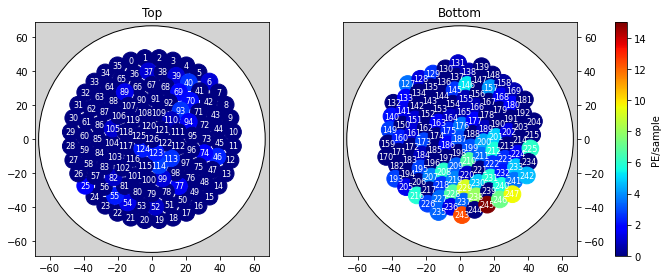

In [7]:
straxen.plot_pmts(peaklets['area_per_channel'][0],vmin=0, vmax=15,
                  cmap=plt.cm.jet,label='PE/sample',
                  xenon1t='true')

* Peaks are in PE/sample units, gains have been applied 

#### From peak_bulding.py @strax

Return peaks made from grouping hits together

    Assumes all hits have the same dt
    :param hits: Hit (or any interval) to group
    :param left_extension: Extend peaks by this many ns left
    :param right_extension: Extend peaks by this many ns right
    :param gap_threshold: No hits for this much ns means new peak
    :param min_channels: Peaks with less contributing channels are not returned
    :param min_area: Peaks with less than min_area are not returned


## Look into records

In [8]:
records = st.get_array('170204_1410','records',seconds_range=(0,10))

* find hits first (hits (intervals >= threshold) found in records)

In [9]:
hits = strax.find_hits(records)

In [10]:
hits

array([(1486217408220428550, 2, 10, 159, 244.69922 , 50, 52, 0, 0,      0, 15., 192.34961 ),
       (1486217408220553750, 1, 10, 203,  40.174805, 50, 51, 0, 0,      1, 15.,  40.174805),
       (1486217408220643750, 2, 10, 204, 294.3496  , 50, 52, 0, 0,      2, 15., 256.1748  ),
       ...,
       (1486217417833043680, 2, 10, 142, 189.09961 , 50, 52, 0, 0, 125267, 15., 154.5498  ),
       (1486217417833142920, 2, 10, 172,  92.65039 , 50, 52, 0, 0, 125268, 15.,  66.825195),
       (1486217417833214830, 3, 10, 159, 387.3994  , 50, 53, 0, 0, 125269, 15., 279.7998  )],
      dtype=[(('Start time since unix epoch [ns]', 'time'), '<i8'), (('Length of the interval in samples', 'length'), '<i4'), (('Width of one sample [ns]', 'dt'), '<i2'), (('Channel/PMT number', 'channel'), '<i2'), (('Integral [ADC x samples]', 'area'), '<f4'), (('Index of sample in record in which hit starts', 'left'), '<i2'), (('Index of first sample in record just beyond hit (exclusive bound)', 'right'), '<i2'), (('For lon

* sort hits by time

In [11]:
hits = strax.sort_by_time(hits)

* plot hits from pmt 124 (top array)

In [12]:
hits_ch124 = hits[hits['channel']== 124]

In [13]:
t0 = peaklets['time'][0]

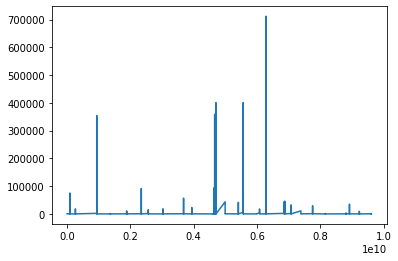

In [14]:
plt.plot((hits_ch124['time']-t0),hits_ch124['area'])

In [15]:
hits_ch1 = hits[hits['channel']== 1]

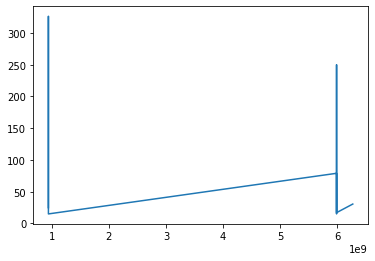

In [16]:
plt.plot((hits_ch1['time']-t0),hits_ch1['area'])

In [17]:
def plot_hits(hits, t0, array):
    pmts = straxen.common.pmt_positions(True)
    if array == 'top':
        pmts = len(pmts[pmts['array']=='top'])
    elif array == 'bottom':
        pmts = len(pmts[pmts['array']=='bottom'])
    else:
        print('is warm outside')
        
    fig, axs = plt.subplots(pmts,figsize=(15,pmts))
    gs = fig.add_gridspec(1,pmts, hspace=0 , wspace=0)
    fig.suptitle('{} PMT hits'.format(array))
    fig.tight_layout()
    fig.subplots_adjust(top=0.978)
    
    for p in range(0,pmts):   
        my_pmt = p
        if array == 'bottom':
            my_pmt = p+127
        h = hits[hits['channel'] == my_pmt]
        axs[p].plot(h['time']-t0, h['area'],label='PMT #{}'.format(my_pmt))
        axs[p].legend(loc='upper right')
        # Need to be clever here!
        axs[p].set_xlim(0,1e10)
        # what about y-axis?
   
    fig.subplots_adjust(hspace=0)

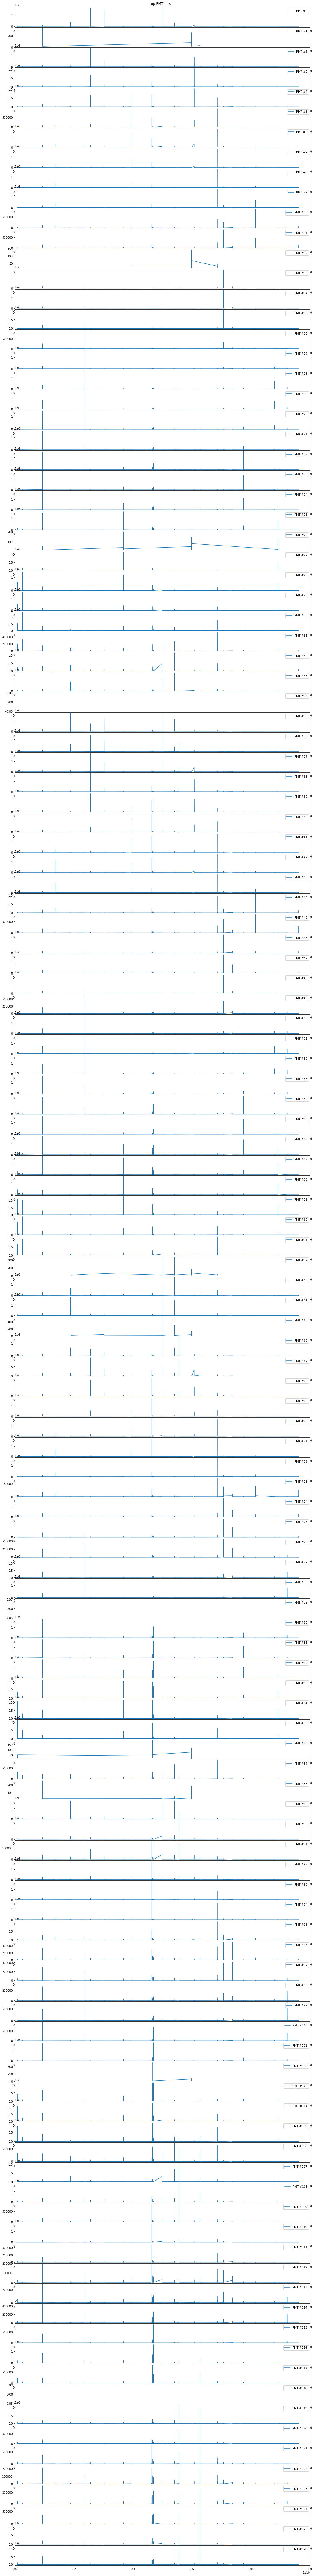

In [18]:
plot_hits(hits,t0,'top')

### Look at bottom PMT array

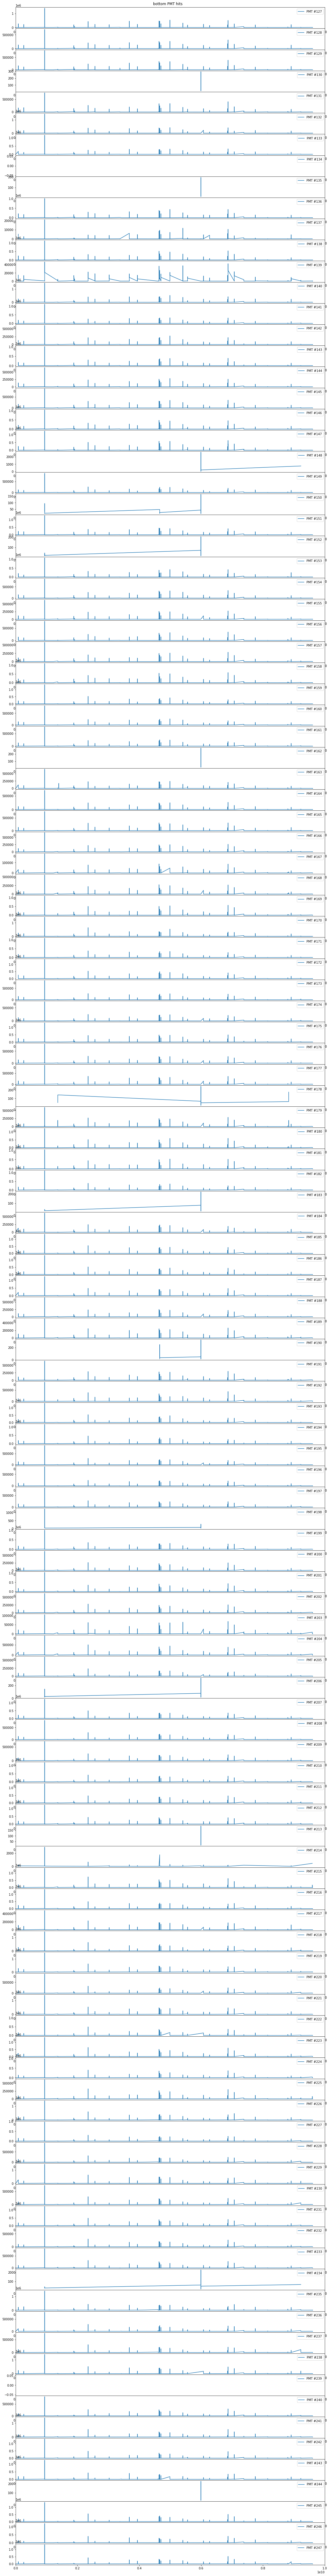

In [207]:
plot_hits(hits,t0,'bottom')

In [2]:
import SimpSOM as sps 

In [3]:
from sklearn.cluster import KMeans